In [3]:
from dataset import SpineDataset
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
import nibabel as nib
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [10]:
# Function to count label distribution
def count_label_distribution(dataset):
    osteoporosis_count = 0
    low_bone_density_count = 0
    normal_count = 0

    for _, label in dataset:
        t_score = label.item()
        if t_score <= -2.5:
            osteoporosis_count += 1
        elif -2.5 < t_score <= -1:
            low_bone_density_count += 1
        elif t_score > -1:
            normal_count += 1

    return osteoporosis_count, low_bone_density_count, normal_count

# Plotting the distribution
def plot_label_distribution(osteoporosis_count, low_bone_density_count, normal_count):
    labels = ['Osteoporosis', 'Low Bone Density', 'Normal']
    sizes = [osteoporosis_count, low_bone_density_count, normal_count]
    colors = ['lightcoral', 'lightyellow', 'lightblue']
    label_percentages = [f'{label}\n{count} ({count/sum(sizes)*100:.1f}%)' for label, count in zip(labels, sizes)]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=label_percentages, colors=colors, startangle=140, pctdistance=0.85, labeldistance=0.4, textprops={'fontsize': 14})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

Osteoporosis: 46, Low Bone Density: 136, Normal: 207


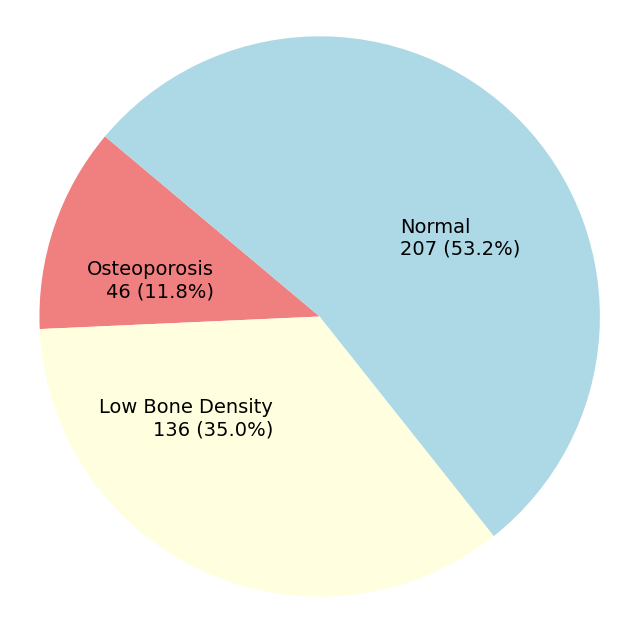

In [11]:
dataset = SpineDataset('/code/ctspine1k_inference_L1_crop', '/code/DEXA_vs_CT_subject_ID_and_T-score_delete377.xlsx')
osteoporosis_count, low_bone_density_count, normal_count = count_label_distribution(dataset)
print(f'Osteoporosis: {osteoporosis_count}, Low Bone Density: {low_bone_density_count}, Normal: {normal_count}')
plot_label_distribution(osteoporosis_count, low_bone_density_count, normal_count)

In [12]:
import os
import shutil
import pandas as pd

nii_folder = "/code/ctspine1k_inference_L1_crop"
excel_file = "/code/DEXA_vs_CT_subject_ID_and_T-score_delete377.xlsx"
val_folder = "/code/ctspine1k_val"
test_folder = "/code/ctspine1k_test"
train_folder = "/code/ctspine1k_train"

df = pd.read_excel(excel_file)

categories = {0: [], 1: [], 2: []}

for nii_file in os.listdir(nii_folder):
    if nii_file.endswith(".nii.gz"):
        subject_id = int(nii_file.split('.')[0])
        t_score = df.loc[df['SubjectID'] == subject_id, 'T-score'].values
        
        if len(t_score) > 0:
            t_score = t_score[0]
            if t_score <= -2.5:
                categories[0].append(nii_file)
            elif -2.5 < t_score <= -1:
                categories[1].append(nii_file)
            else:
                categories[2].append(nii_file)

def copy_files(file_list, destination_folder, count):
    for i in range(count):
        shutil.copy(os.path.join(nii_folder, file_list[i]), destination_folder)

os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(train_folder, exist_ok=True)

for category in categories:
    if len(categories[category]) >= 26:
        copy_files(categories[category], val_folder, 13)
        copy_files(categories[category][13:], test_folder, 13)
        copy_files(categories[category][26:], train_folder, len(categories[category]) - 26)

print("Validation files:")
print(os.listdir(val_folder))
print("Test files:")
print(os.listdir(test_folder))
print("Training files:")
print(os.listdir(train_folder))

Validation files:
['000182.nii.gz', '000271.nii.gz', '000358.nii.gz', '000307.nii.gz', '000216.nii.gz', '000294.nii.gz', '000171.nii.gz', '000342.nii.gz', '000130.nii.gz', '000109.nii.gz', '000306.nii.gz', '000058.nii.gz', '000300.nii.gz', '000005.nii.gz', '000310.nii.gz', '000023.nii.gz', '000258.nii.gz', '000061.nii.gz', '000150.nii.gz', '000218.nii.gz', '000301.nii.gz', '000019.nii.gz', '000208.nii.gz', '000151.nii.gz', '000004.nii.gz', '000188.nii.gz', '000072.nii.gz', '000108.nii.gz', '000059.nii.gz', '000117.nii.gz', '000206.nii.gz', '000162.nii.gz', '000318.nii.gz', '000194.nii.gz', '000140.nii.gz', '000187.nii.gz', '000191.nii.gz', '000118.nii.gz', '000013.nii.gz']
Test files:
['000227.nii.gz', '000337.nii.gz', '000168.nii.gz', '000157.nii.gz', '000386.nii.gz', '000251.nii.gz', '000086.nii.gz', '000360.nii.gz', '000354.nii.gz', '000199.nii.gz', '000256.nii.gz', '000243.nii.gz', '000147.nii.gz', '000275.nii.gz', '000268.nii.gz', '000057.nii.gz', '000149.nii.gz', '000107.nii.gz',

39
